# Geographical Data Mapping

## Usage of basic mapping functions and Python libraries to map Santiago de Cali neighborhoods using shapefiles

__Ricardo Hincapie - Software Engineer__

In [32]:
pip install pyshp

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import shapefile as shp # Here it imports the pyshp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline

In [12]:
shp_path = "Barrios_Cali/Barrios.shp"
sf = shp.Reader(shp_path, encoding="latin1") # The key here is the encoding

In [13]:
len(sf.shapes()) # How many rows the dataset has

337

In [14]:
 sf.records()[0] # Example of a datapoint

Record #0: ['0610', 'Ciudadela Floralia', 805810.0, 4110.0]

In [15]:
sf.records()[0][1] # Example of a position inside a datapoint

'Ciudadela Floralia'

### Documentation for this is at:

https://pypi.org/project/pyshp/#reading-shapefiles

Tutorial Followed: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

-------------------------------------------------------------------------------------------------------------------

In [20]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:] # We take the column names
    records = sf.records()
    print('---- This are the fields ----\n', fields)
    print('---- This are the records ----\n', records[0])
    shps = [s.points for s in sf.shapes()]
    print('---- This are the shapes ----\n', shps[0])
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [21]:
df = read_shapefile(sf) #Executes the above method
print("\n\n---- dataframe: (number of neighborhoods, number of columns) ----\n")
df.shape

---- This are the fields ----
 ['id_barrio', 'barrio', 'area', 'perimetro']
---- This are the records ----
 Record #0: ['0610', 'Ciudadela Floralia', 805810.0, 4110.0]
---- This are the shapes ----
 [(1065621.11467656, 878387.971083927), (1065599.28807695, 878370.21563519), (1065557.48383373, 878343.757278813), (1065541.31479917, 878335.579845556), (1065511.44624924, 878320.473929652), (1065454.82531173, 878296.661417836), (1065409.31689446, 878277.082240302), (1065365.92514759, 878260.148899185), (1065344.75844175, 878246.919719725), (1065324.65007116, 878229.457198711), (1065315.76674618, 878215.30968656), (1065310.36254466, 878206.702998515), (1065271.00901726, 878136.653743177), (1065257.44577973, 878112.511188116), (1065226.75405596, 878049.540254852), (1065225.06744007, 878047.034426412), (1065208.23318813, 878022.023546513), (1065191.29982324, 877999.269345921), (1065168.54561412, 877973.869309567), (1065152.14141683, 877952.173443579), (1065129.9163753, 877927.30257412), (10651

(337, 5)

In [22]:
df.sample(3) # Random sample of the dataset

,id_barrio,barrio,area,perimetro,coords
242,2097,Cementerio - Carabineros,263379.0,2687.0,"[(1056813.94742444, 869823.910918564), (105680..."
246,1921,Nueva Tequendama,453164.0,2949.0,"[(1059335.49957519, 869700.541804763), (105936..."
225,1916,Los Cámbulos,412877.0,2615.0,"[(1059542.62637719, 870175.510234297), (105958..."


In [23]:
df[df.barrio == 'Cristóbal Colón'] # Search for an specific data

,id_barrio,barrio,area,perimetro,coords
200,1009,Cristóbal Colón,519877.0,4658.0,"[(1061094.15960647, 870836.413560031), (106118..."


In [24]:
df.barrio # Shows a sample of barrio column

0                         Ciudadela Floralia
1                       Brisas de Los Alamos
2      Área en Desarrollo - Parque del Amor
3                      Urbanización La Flora
4                             Altos de Menga
                       ...                  
332                           Club Campestre
333                    Urbanización Rio Lili
334                      Parcelaciones Pance
335             Villa del Prado - El Guabito
336                         Puerto Mallarino
Name: barrio, Length: 337, dtype: object

In [25]:
### Function to plot a specific shape

In [26]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure() # This is the figure object based to handle axes and the canvass
    ax = plt.axes() # The region of the image with the data space
    ax.set_aspect('equal') # Sets the aspect of axes scaling
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1)) # Creates an array of zeros
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0] # Populates the array with the first element of the coordinates tuple
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) # Plots x vs y as lines and/or markers
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=15)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2]) # Sets the X limit with -apparently- arbitrary data points
    return x0, y0 # Returns the mean points for the plot

(1061444.3878764473, 870363.73757686)

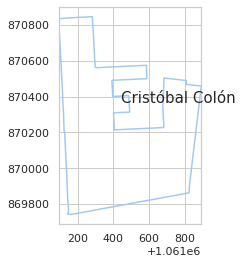

In [27]:
plot_shape(200, 'Cristóbal Colón')

In [28]:
sf.shape(0)

In [29]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,17)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

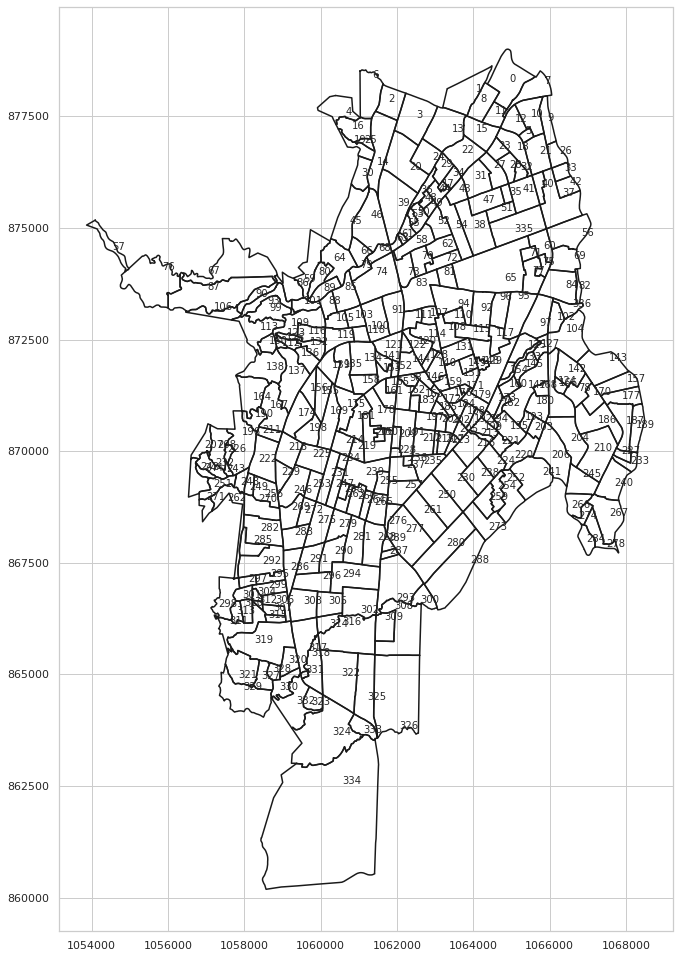

In [30]:
plot_map(sf)

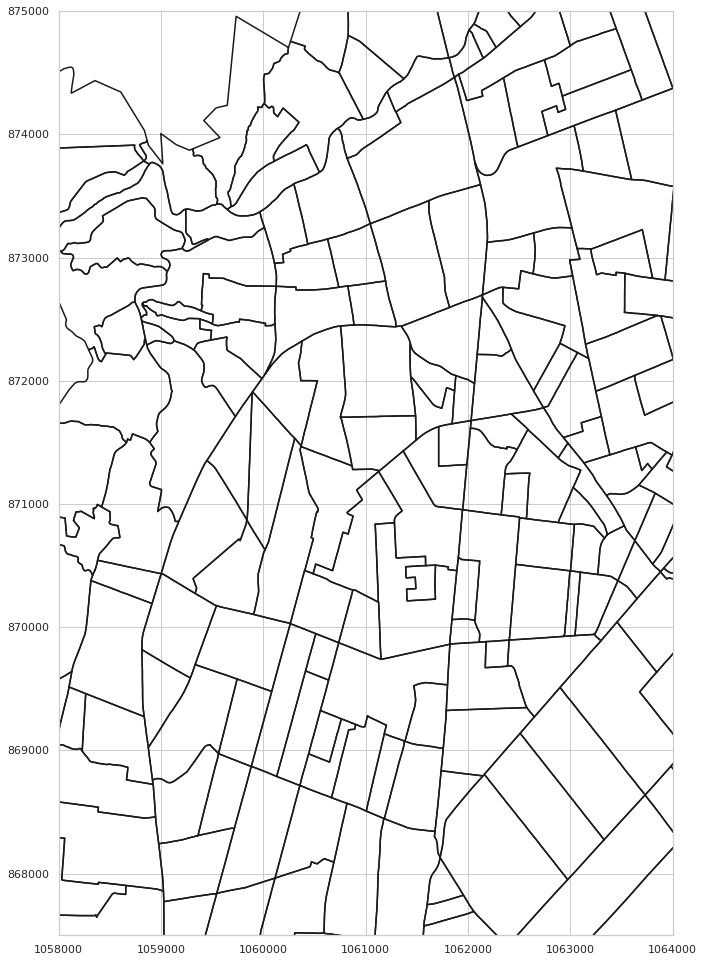

In [31]:
y_lim = (867500, 875000)
x_lim = (1058000, 1064000)
plot_map(sf, x_lim, y_lim)